In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.sample(5)

,cgpa,placement_exam_marks,placed
204,7.01,5.0,1
413,6.65,28.0,1
594,6.95,64.0,0
534,6.05,45.0,1
709,6.97,42.0,1


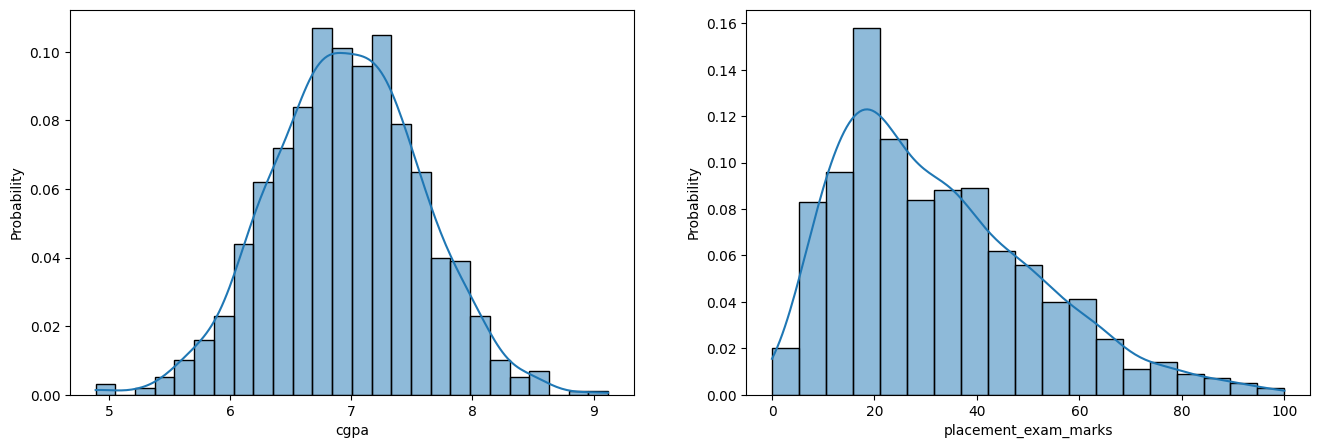

In [4]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df['cgpa'],kde=True,stat='probability',legend=True)

plt.subplot(1,2,2)
sns.histplot(df['placement_exam_marks'],kde=True,stat='probability',legend=True)

plt.show()

## Note:
    1. Above pdf clearly suggest that it is a right skewed.

In [5]:
df['placement_exam_marks'].skew() # right skewed

0.8356419499466834

In [6]:
df['cgpa'].skew()

-0.014529938929314918

In [7]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

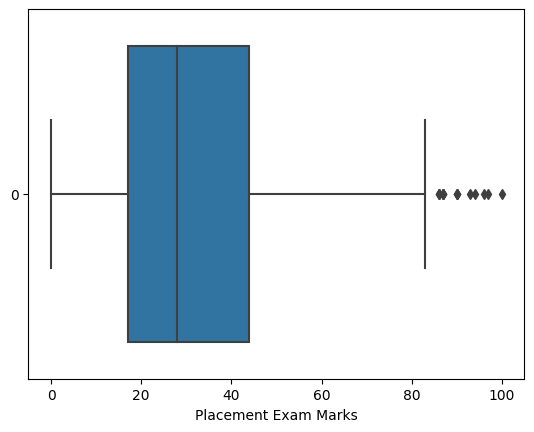

In [8]:
sns.boxplot(df['placement_exam_marks'],orient='h')
plt.xlabel('Placement Exam Marks')
plt.show()

In [9]:
# Finding IQR
Q1 = df['placement_exam_marks'].quantile(0.25)
Q3 = df['placement_exam_marks'].quantile(0.75)

In [10]:
Q1

17.0

In [11]:
Q3 

44.0

In [12]:
iqr =  Q3-Q1
iqr

27.0

In [13]:
lower_limit = Q1-1.5*iqr
upper_limit = Q3 + 1.5*iqr

In [14]:
lower_limit

-23.5

In [15]:
upper_limit

84.5

## Note:
    1. Minimum is 0, but we are allowing till -23.5, hence there will be know outlier in left end.
    2. The outlier will be present in right end as maximum is 100.

## Finding Outlier

In [16]:
df[df['placement_exam_marks'] > upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [17]:
df[df['placement_exam_marks'] > upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [18]:
for i in range(len(df['placement_exam_marks'])):
    if df.loc[i]['placement_exam_marks']>upper_limit:
        print(i)

9
40
61
134
162
283
290
311
324
630
685
730
771
846
917


In [19]:
df[df['placement_exam_marks']>upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [20]:
df[df['placement_exam_marks']>upper_limit].shape

(15, 3)

In [21]:
df[df['placement_exam_marks']<lower_limit].shape

(0, 3)

## Trimming

In [22]:
new_df = df[df['placement_exam_marks'] < upper_limit]

In [23]:
new_df.shape

(985, 3)

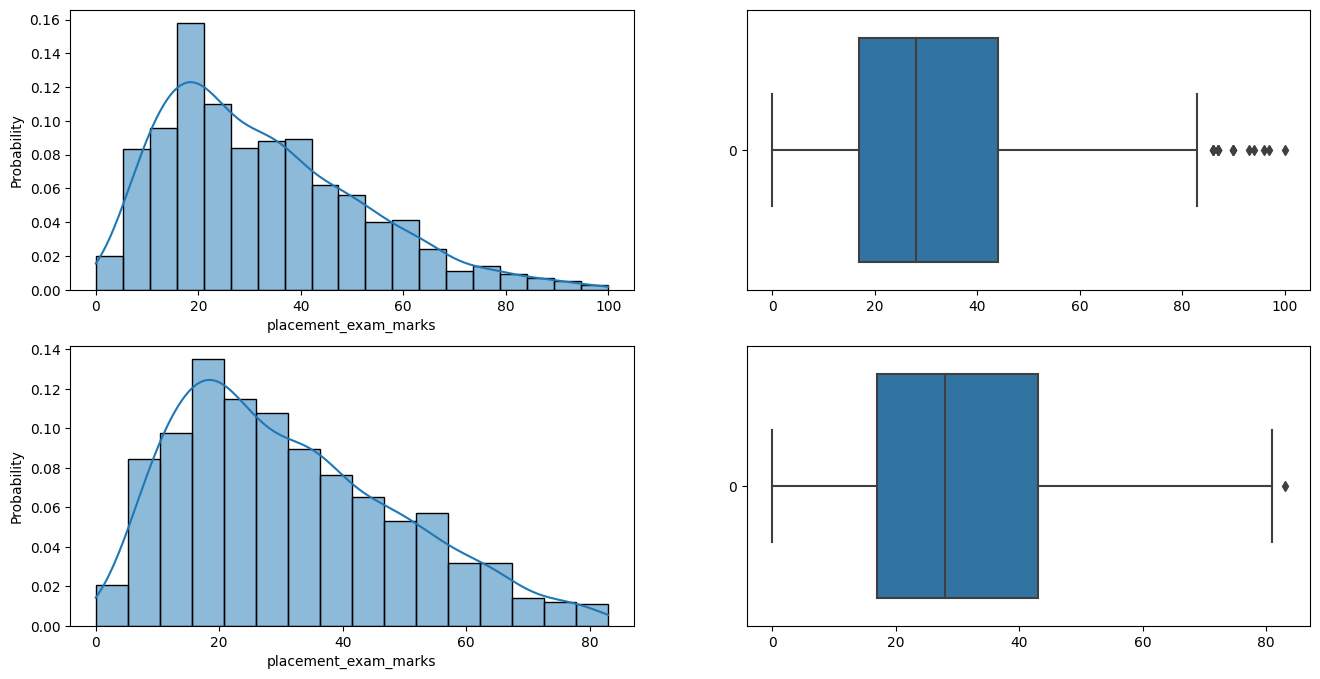

In [24]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(df['placement_exam_marks'],kde=True,stat='probability',legend=True)

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'],orient='h')


plt.subplot(2,2,3)
sns.histplot(new_df['placement_exam_marks'],kde=True,stat='probability',legend=True)

plt.subplot(2,2,4)
sns.boxplot(new_df['placement_exam_marks'],orient='h')

plt.show()

## Capping

In [25]:
new_df_cap = df.copy()                     

In [26]:
new_df_cap['placement_exam_marks'] = np.where(
    new_df_cap['placement_exam_marks'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['placement_exam_marks'] < lower_limit,
        lower_limit,
        new_df_cap['placement_exam_marks']
    )
)

In [27]:
new_df_cap.shape

(1000, 3)

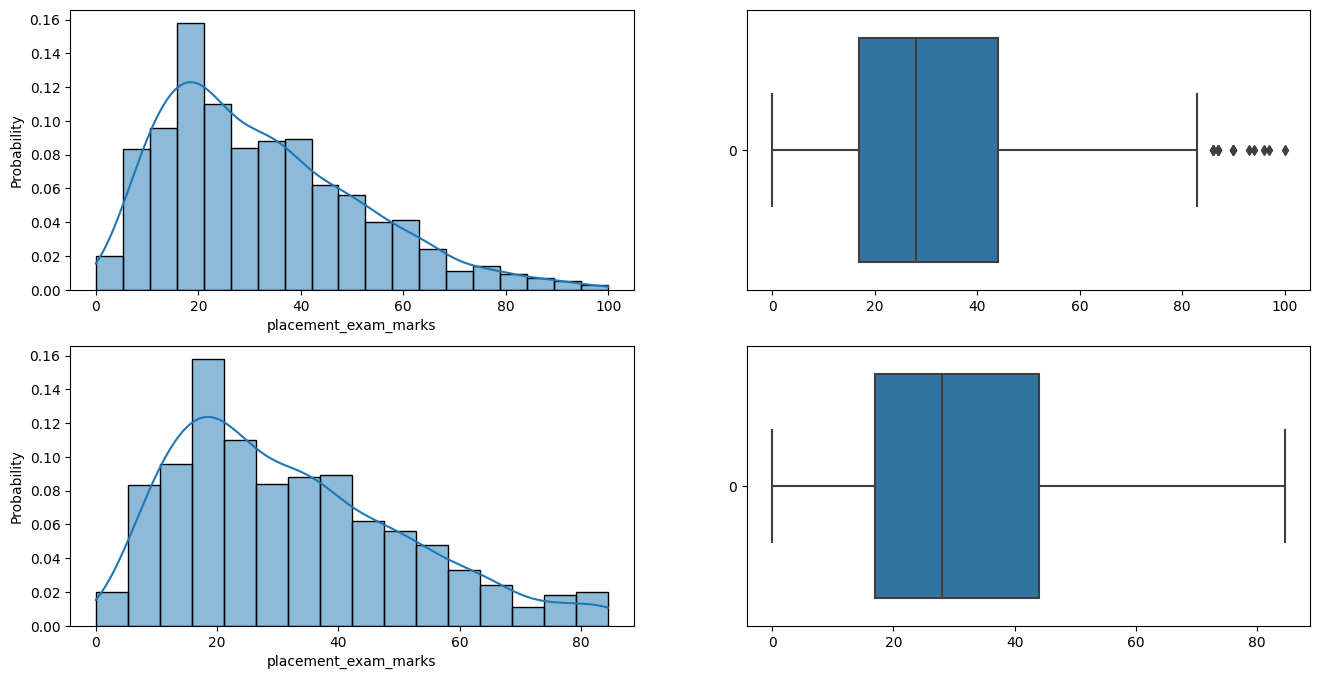

In [28]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(df['placement_exam_marks'],kde=True,stat='probability',legend=True)

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'],orient='h')


plt.subplot(2,2,3)
sns.histplot(new_df_cap['placement_exam_marks'],kde=True,stat='probability',legend=True)

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['placement_exam_marks'],orient='h')

plt.show()